Before we start, we need some data to work with. Let's create a simple dataset using Python's `pandas` library and `faker` to generate random data.

In [103]:
import faker
import pandas as pd

In [104]:
fake = faker.Faker()

In [105]:
def generate_synthetic_specimens(num_samples=100):
    """Generate synthetic specimen data."""
    data = {
        "specimen_id": [fake.ean8() for _ in range(num_samples)],
        "collection_date": [
            fake.past_datetime(start_date="-5y") for _ in range(num_samples)
        ],
        "sample_type": [
            fake.random_element(elements=("plasma", "urine", "serum"))
            for _ in range(num_samples)
        ],
    }
    return pd.DataFrame(data)

In [106]:
synthetic_data = generate_synthetic_specimens(1000)
print(synthetic_data.head())

  specimen_id     collection_date sample_type
0    87056945 2021-04-05 08:10:58       serum
1    58890981 2022-01-17 11:30:42       urine
2    89585115 2021-10-25 12:09:23       urine
3    18715538 2024-02-11 23:45:19       serum
4    32585179 2024-04-19 02:03:39       serum


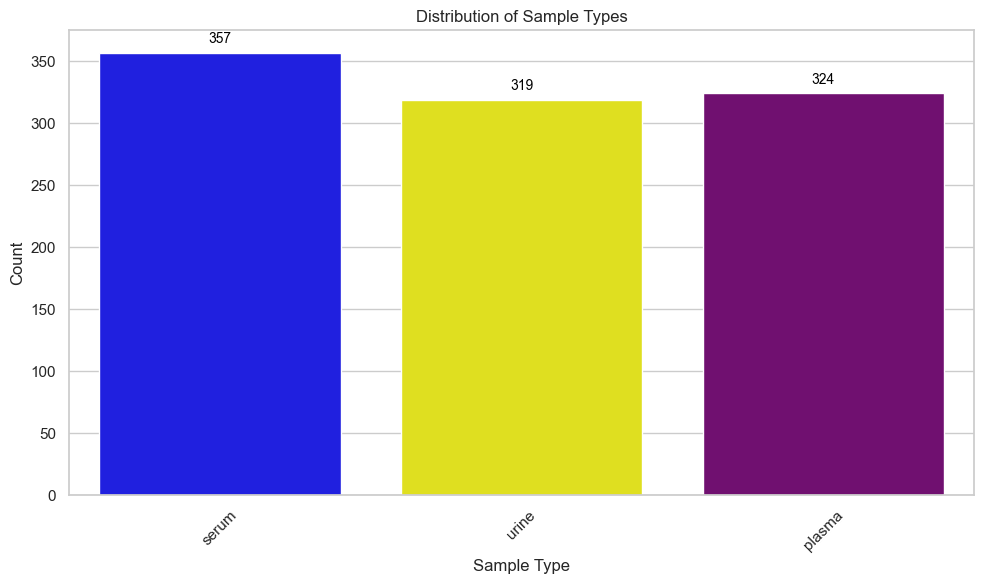

In [107]:
# Plot the distribution of sample types, color-coded by sample type
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=synthetic_data,
    x="sample_type",
    legend=False,
    hue="sample_type",
    palette={"plasma": "purple", "urine": "yellow", "serum": "blue"},
)
# Add specimen counts to the bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title("Distribution of Sample Types")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()